In [0]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization,ZeroPadding2D
from keras.optimizers import SGD
from keras import applications
from keras.models import Model
import cv2, numpy as np
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
!nvidia-smi

Tue Aug 27 05:49:36 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import os

In [0]:
os.listdir('/content/drive/My Drive/DEEP LEARNING')

In [0]:
cat_path= '/content/drive/My Drive/DEEP LEARNING/sample_cat'
dog_path= '/content/drive/My Drive/DEEP LEARNING/sample_dog'

In [0]:
IMG_SIZE=224
labels=[]

In [0]:
def image_read(TRAIN_DIR):
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        training_data.append(np.array(img))
    return training_data

In [0]:
def labelss(data,class_value):
  y=np.ones(len(data),dtype=int)*class_value
  return y

In [0]:
cat_path

In [0]:
cat_data=image_read(cat_path)

100%|██████████| 141/141 [00:00<00:00, 219.19it/s]


In [0]:
import matplotlib.pyplot as plt

In [0]:
np.shape(cat_data)

In [0]:
plt.imshow(cat_data[0])

In [0]:
cat_label=labelss(cat_data,1)

In [0]:
cat_label.shape

In [0]:
dog_data=image_read(dog_path)

100%|██████████| 141/141 [00:00<00:00, 196.86it/s]


In [0]:
class_dog=labelss(dog_data,0)

In [0]:
class_dog

In [0]:
dataset=np.concatenate((dog_data,cat_data))

In [0]:
dataset[166].shape

In [0]:
class_labels=np.concatenate((class_dog,cat_label))

In [0]:
class_labels

In [0]:
import sklearn.model_selection as ms

In [0]:
x_train,x_test,y_train,y_test=ms.train_test_split(dataset,class_labels,test_size=0.1,random_state=121)

In [0]:
x_train.shape

In [0]:
from keras.utils import to_categorical
y= to_categorical(y_train)
y_test=to_categorical(y_test)

In [0]:
y.shape

In [0]:
y

In [0]:
# Initialize model
alexnet = Sequential()

# Layer 1
alexnet.add(Conv2D(96, (11, 11), input_shape=(224,224,3), padding='same'))
alexnet.add(BatchNormalization())
conv1=Activation('relu')
alexnet.add(conv1) 
max_pool_1=MaxPooling2D(pool_size=(2, 2))
alexnet.add(max_pool_1)

# Layer 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
conv2=Activation('relu')
alexnet.add(conv2)
max_pool_2=MaxPooling2D(pool_size=(2, 2))
alexnet.add(max_pool_2)

# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))

# Layer 5
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(1024))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(1024))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(2))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

W0827 05:51:41.135878 139942162884480 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 96)      34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 96)      384       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 96)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 96)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 256)     614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 256)     1024      
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 256)     0

In [0]:
alexnet.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [0]:
history=alexnet.fit(x_train, y, batch_size=1, epochs=10, validation_split=0.1, shuffle=True)

Train on 227 samples, validate on 26 samples
Epoch 1/10
227/227 [==============================] - 56s 246ms/sample - loss: 0.6934 - acc: 0.4846 - val_loss: 5.7738 - val_acc: 0.6923
Epoch 2/10
227/227 [==============================] - 52s 230ms/sample - loss: 0.6931 - acc: 0.5198 - val_loss: 185.5948 - val_acc: 0.7308
Epoch 3/10
227/227 [==============================] - 52s 229ms/sample - loss: 0.6932 - acc: 0.5198 - val_loss: 2495.2808 - val_acc: 0.7308
Epoch 4/10
227/227 [==============================] - 52s 229ms/sample - loss: 0.6931 - acc: 0.5198 - val_loss: 6432.7758 - val_acc: 0.7308
Epoch 5/10
227/227 [==============================] - 52s 229ms/sample - loss: 0.6929 - acc: 0.5198 - val_loss: 7421.5525 - val_acc: 0.7308
Epoch 6/10
227/227 [==============================] - 52s 229ms/sample - loss: 0.6927 - acc: 0.5198 - val_loss: 7364.4483 - val_acc: 0.7308
Epoch 7/10
227/227 [==============================] - 52s 229ms/sample - loss: 0.6928 - acc: 0.5198 - val_loss: 7499.04

In [0]:
import gc 

In [0]:
gc.collect()

In [0]:
alexnet.predict(x_test[11].reshape(1,224,224,3))

array([[1., 0.]], dtype=float32)

In [0]:
history.history.keys()

In [0]:
plt.plot(history.history['val_acc'])

In [0]:
img_to_visualize =x_train[11]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

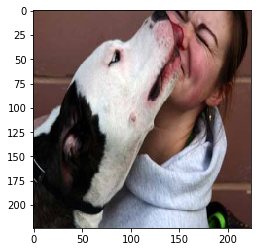

In [0]:
plt.imshow(x_train[11])

In [0]:
def layer_to_visualize(layer,Number_of_filters):
    inputs = [keras.backend.learning_phase()] + alexnet.inputs

    _convout1_f = keras.backend.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = int(np.ceil(Number_of_filters/2))
    m = int(np.floor(Number_of_filters/2))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(15,15))
    for i in range(Number_of_filters):
        ax = fig.add_subplot(m,n,1+i)
        ax.imshow(convolutions[:,:,i])
    return convolutions

Shape of conv: (112, 112, 256)


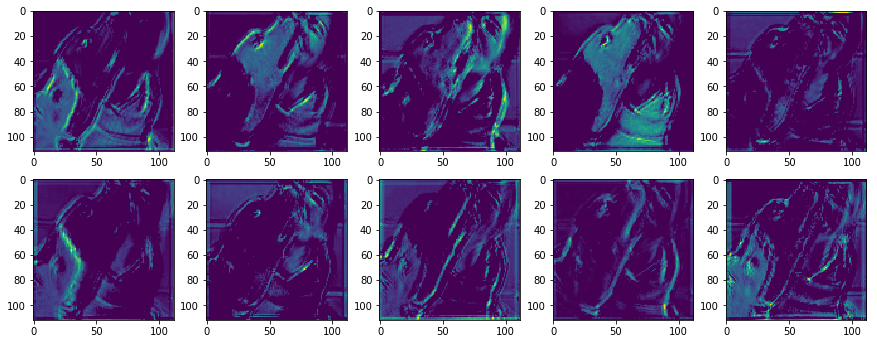

In [0]:
conv_1=layer_to_visualize(conv2,10)

Shape of conv: (56, 56, 256)


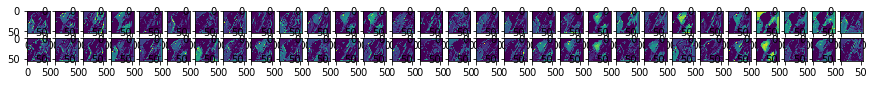

In [0]:
max_pools=layer_to_visualize(max_pool_2,60)

In [0]:
plt.imshow(conv_1[:,:,3])

In [0]:

plt.imshow(conv_1[10])